In [1]:
import pathlib
import sys
import string

import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import autocrit
import autocrit_tools

sys.path.append("..")

import shared.format
import shared.tools
import shared.criticalpoints as cps

plt.rcParams["font.size"] = shared.format.FONTSIZE

In [2]:
pickle_dir = pathlib.Path("data") / "nonlinear-results"

success_df = pd.read_pickle(pickle_dir / "dnn-failure-success.pkl")
failure_df = pd.read_pickle(pickle_dir / "dnn-failure-failure.pkl")

In [3]:
len(success_df) / (len(success_df) + len(failure_df))

0.4

[None, None]

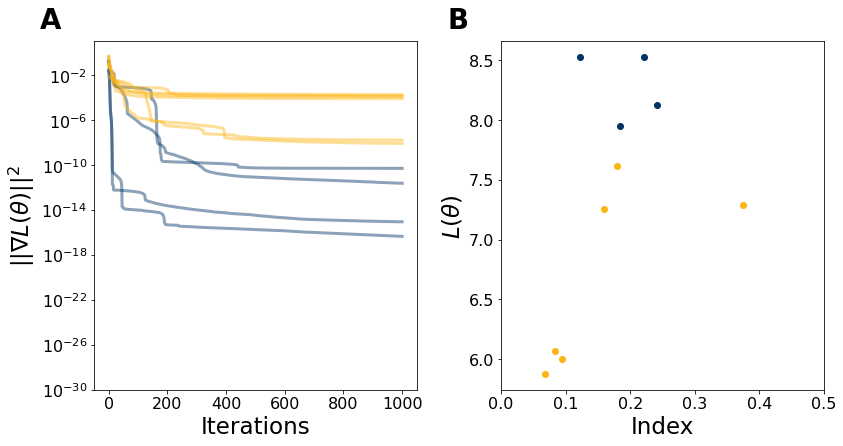

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sgn_ax, loss_index_ax = axs

cps.make_trajectory_panel(success_df, failure_df, ax=sgn_ax);

cps.make_loss_index_panel(success_df, color="C0", ax=loss_index_ax);
cps.make_loss_index_panel(failure_df, color="C1", ax=loss_index_ax);

loss_index_ax.set_xlim([0, 0.5]);
plt.tight_layout();

[shared.tools.add_panel_label(letter, ax, pos=(-0.1, 1.1), size=shared.format.TITLESIZE)
 for letter, ax in zip(string.ascii_uppercase, axs.flatten())]

bbox = fig.bbox_inches.from_bounds(0, 0.2, 12, 6.2)

fig.savefig("nonlinear-failure.pdf", bbox_inches=bbox)